In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('nl_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135051 entries, 0 to 135050
Data columns (total 10 columns):
CUSTOMER_ID         135051 non-null int64
ORDERS              135051 non-null int64
FIRST_ORDER_DATE    135051 non-null object
LAST_ORDER_DATE     135051 non-null object
TOTAL_CM2           135051 non-null object
NET_SALES           135051 non-null object
CM2_REL             135051 non-null object
ZTQ_ID              135051 non-null int64
START_DATE          135051 non-null object
EXPIRY_DATE         135051 non-null object
dtypes: int64(3), object(7)
memory usage: 10.3+ MB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,8233527,15,2017-06-01,2018-04-08,20.3311,594.3218,3.42,54,2017-11-15,2020-11-15
1,14628801,22,2017-06-01,2018-05-24,179.7354,1959.9260,9.17,51,2017-08-07,2018-08-07
2,11604469,11,2017-06-02,2018-05-02,98.5331,520.1653,18.94,51,2017-12-11,2018-12-11
3,16537219,6,2017-06-02,2018-04-30,20.0888,293.3306,6.85,55,2017-06-02,2018-06-02
4,10243135,6,2017-06-02,2018-05-14,5.1966,263.7023,1.97,54,2016-01-02,2019-01-02


In [11]:
tiers = [51, 52, 53, 54, 55, 56, 151, 152]

...........................................................TIER  51 ..........................................................


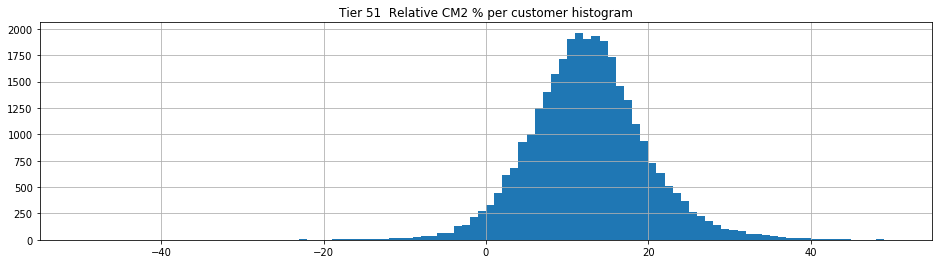

,CM2_REL
count,31209.00
mean,12.51
std,7.22
min,-48.98
25%,8.04
50%,12.37
75%,16.69
max,63.30


CM2% threshold >= 5  is the percentile 13.06
CM2% threshold >= 7  is the percentile 20.28
CM2% threshold >=  9.04  is the percentile 30 allowing us to stay with the 70% of our sample


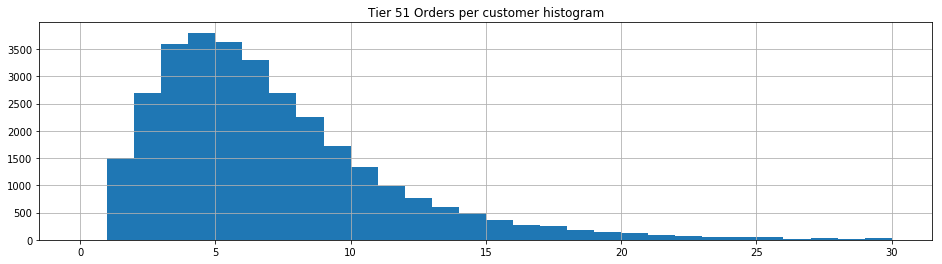

,ORDERS
count,31209.00
mean,6.63
std,4.69
min,1.00
25%,4.00
50%,6.00
75%,8.00
max,86.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  66.39  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  60.82  % from our customers
With CM2% threshold >=  9.04  and Orders >=  4.0  we keep eligible a  53.22  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


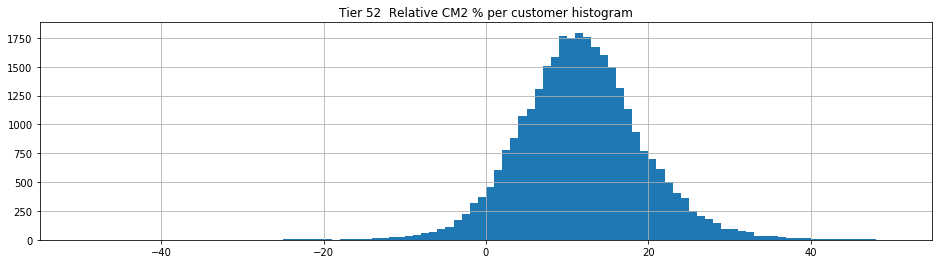

,CM2_REL
count,30902.00
mean,11.60
std,17.22
min,-2673.23
25%,6.88
50%,11.52
75%,16.23
max,57.78


CM2% threshold >= 5  is the percentile 17.57
CM2% threshold >= 7  is the percentile 25.47
CM2% threshold >=  7.93  is the percentile 30 allowing us to stay with the 70% of our sample


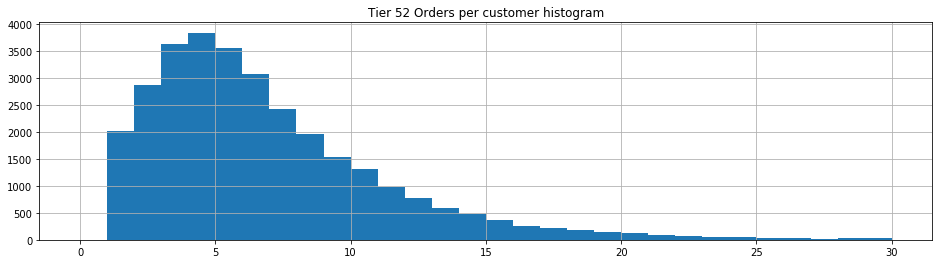

,ORDERS
count,30902.00
mean,6.51
std,5.12
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,200.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  60.92  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  54.98  % from our customers
With CM2% threshold >=  7.93  and Orders >=  4.0  we keep eligible a  51.46  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


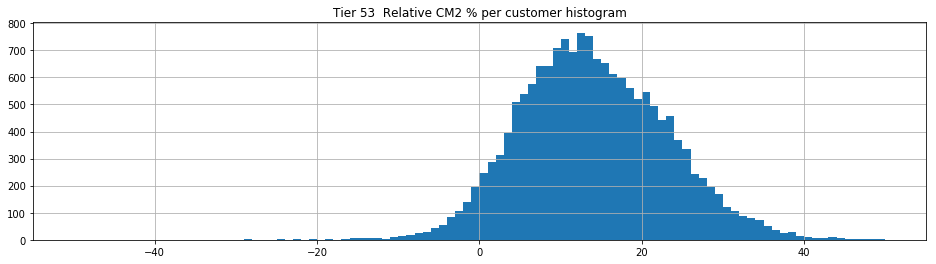

,CM2_REL
count,16365.00
mean,13.76
std,30.34
min,-3688.58
25%,7.72
50%,13.46
75%,20.12
max,57.77


CM2% threshold >= 5  is the percentile 15.44
CM2% threshold >= 7  is the percentile 22.23
CM2% threshold >=  8.98  is the percentile 30 allowing us to stay with the 70% of our sample


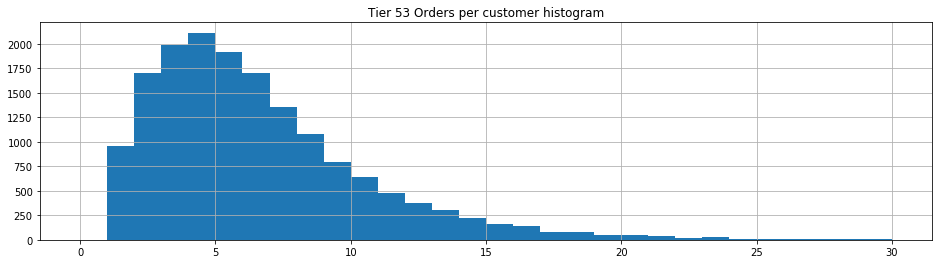

,ORDERS
count,16365.00
mean,6.21
std,4.57
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,132.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  61.0  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  55.9  % from our customers
With CM2% threshold >=  8.98  and Orders >=  4.0  we keep eligible a  49.96  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


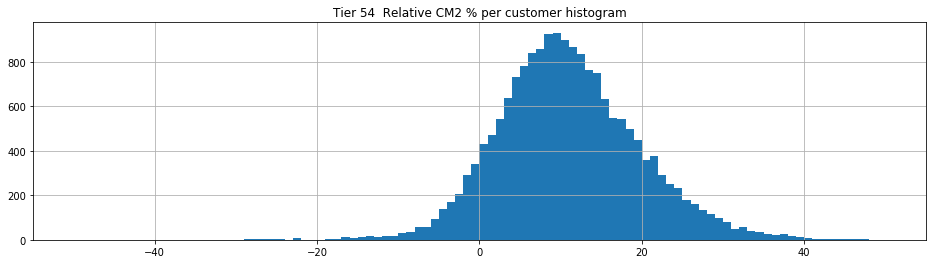

,CM2_REL
count,18086.00
mean,10.94
std,8.75
min,-47.60
25%,5.19
50%,10.38
75%,16.20
max,84.82


CM2% threshold >= 5  is the percentile 24.13
CM2% threshold >= 7  is the percentile 33.09
CM2% threshold >=  6.35  is the percentile 30 allowing us to stay with the 70% of our sample


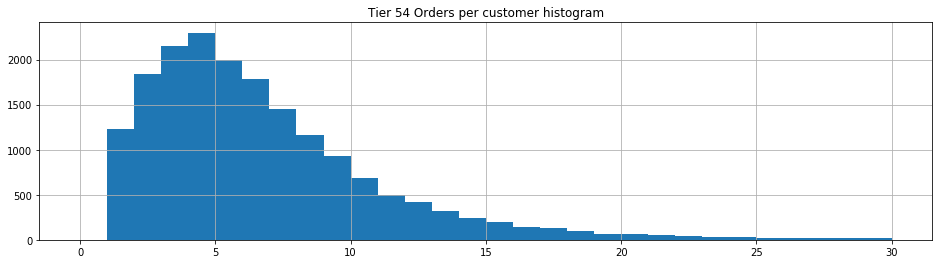

,ORDERS
count,18086.00
mean,6.42
std,5.11
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,96.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  54.57  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  47.62  % from our customers
With CM2% threshold >=  6.35  and Orders >=  4.0  we keep eligible a  50.12  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


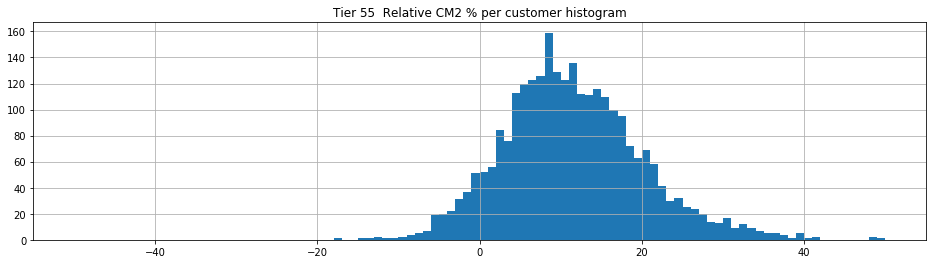

,CM2_REL
count,2689.00
mean,11.51
std,8.65
min,-17.51
25%,5.72
50%,10.81
75%,16.60
max,61.54


CM2% threshold >= 5  is the percentile 21.79
CM2% threshold >= 7  is the percentile 30.83
CM2% threshold >=  6.814  is the percentile 30 allowing us to stay with the 70% of our sample


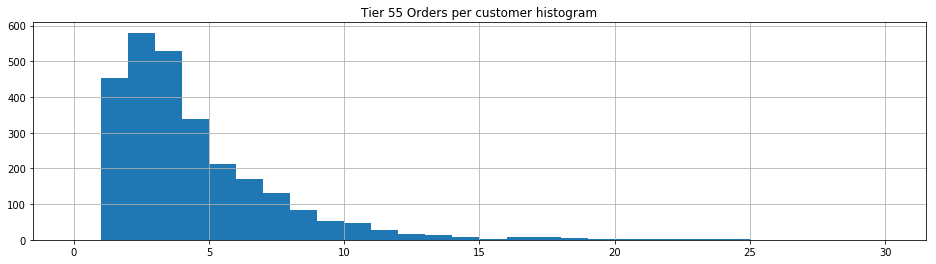

,ORDERS
count,2689.00
mean,3.90
std,2.97
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,24.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  65.04  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  57.2  % from our customers
With CM2% threshold >=  6.814  and Orders >=  2.0  we keep eligible a  57.9  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


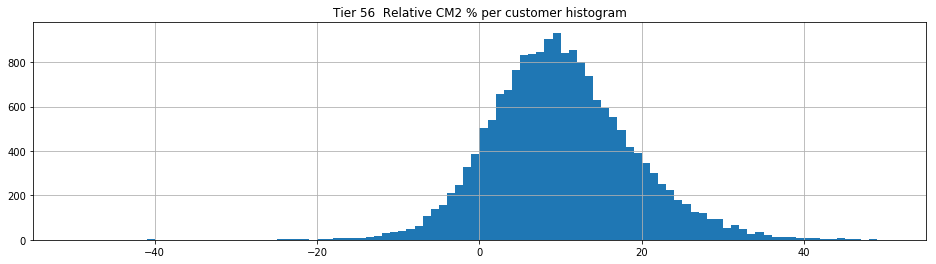

,CM2_REL
count,17922.00
mean,10.08
std,8.75
min,-46.59
25%,4.33
50%,9.57
75%,15.32
max,57.47


CM2% threshold >= 5  is the percentile 27.99
CM2% threshold >= 7  is the percentile 37.32
CM2% threshold >=  5.44  is the percentile 30 allowing us to stay with the 70% of our sample


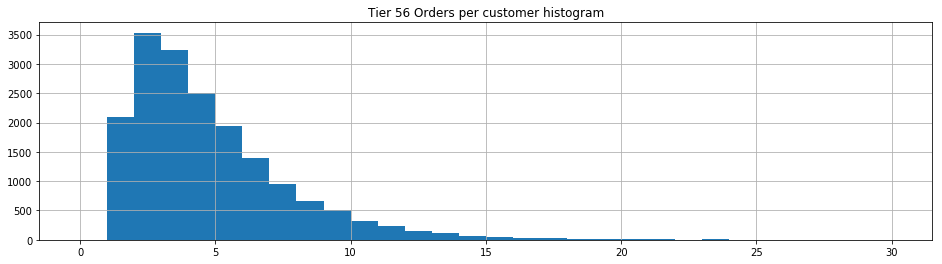

,ORDERS
count,17922.00
mean,4.33
std,3.24
min,1.00
25%,2.00
50%,4.00
75%,6.00
max,88.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  62.98  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  54.51  % from our customers
With CM2% threshold >=  5.44  and Orders >=  2.0  we keep eligible a  61.18  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  151 ..........................................................


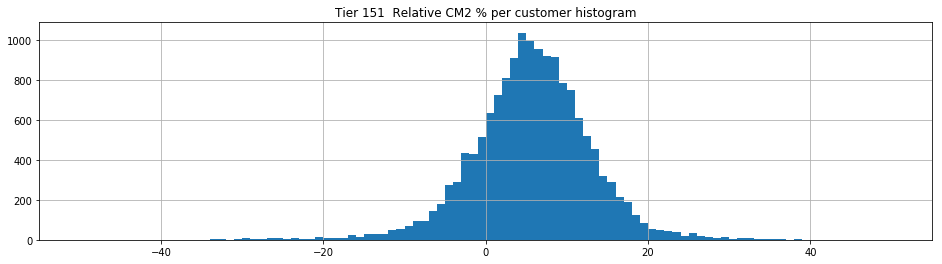

,CM2_REL
count,15461.00
mean,5.63
std,7.40
min,-96.82
25%,1.55
50%,5.75
75%,10.04
max,60.36


CM2% threshold >= 5  is the percentile 45.18
CM2% threshold >= 7  is the percentile 57.8
CM2% threshold >=  2.56  is the percentile 30 allowing us to stay with the 70% of our sample


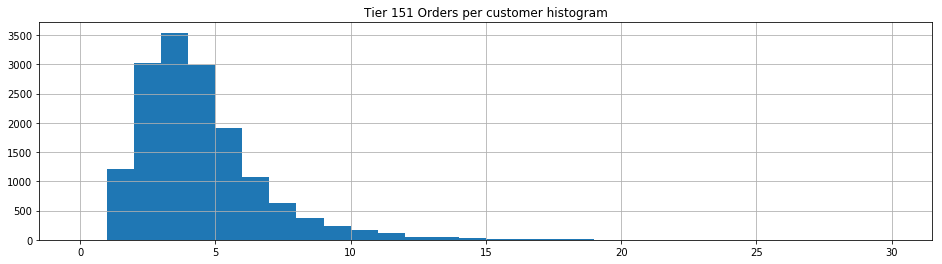

,ORDERS
count,15461.00
mean,3.95
std,2.37
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,30.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  42.89  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  33.12  % from our customers
With CM2% threshold >=  2.56  and Orders >=  3.0  we keep eligible a  54.27  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  152 ..........................................................


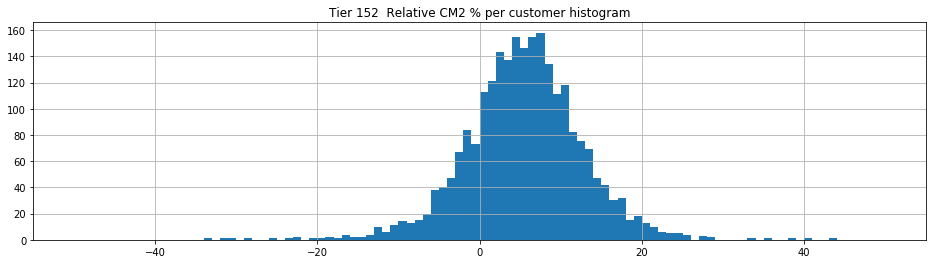

,CM2_REL
count,2417.00
mean,5.44
std,7.22
min,-33.18
25%,1.26
50%,5.53
75%,9.80
max,43.83


CM2% threshold >= 5  is the percentile 46.83
CM2% threshold >= 7  is the percentile 59.29
CM2% threshold >=  2.2179999999999995  is the percentile 30 allowing us to stay with the 70% of our sample


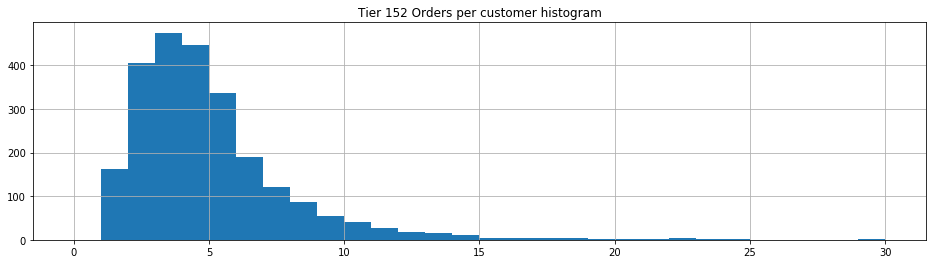

,ORDERS
count,2417.00
mean,4.51
std,3.20
min,1.00
25%,3.00
50%,4.00
75%,5.00
max,57.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  42.37  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  32.35  % from our customers
With CM2% threshold >=  2.2179999999999995  and Orders >=  3.0  we keep eligible a  55.73  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,18746.0,54.294324,23.058980,16.251240,38.882814,49.274340,63.906743,473.799080
52,17718.0,61.681301,27.389811,13.617775,43.467896,55.550349,73.092075,372.811233
53,9594.0,56.037261,24.078368,11.309900,39.819614,50.596077,66.711232,385.759687
54,10309.0,66.495189,30.893963,17.505800,46.010350,59.462800,78.785150,615.415425
55,1033.0,48.378623,22.030119,11.621875,34.064075,43.386350,56.196300,225.235625
56,8284.0,56.235366,28.191005,17.353325,40.178071,50.681838,65.939576,1322.153700
151,7363.0,44.230252,16.285890,16.396725,33.431838,40.970200,51.015270,181.932220
152,1275.0,54.076935,25.139255,18.481475,38.891710,48.125367,62.323550,290.873975


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,18746.0,12.385724,6.627613,-18.13,8.100,12.23,16.3800,48.77
52,17718.0,11.509747,7.121220,-132.67,6.910,11.31,15.8800,47.59
53,9594.0,13.813535,8.570635,-25.93,7.590,13.20,19.8075,51.84
54,10309.0,10.660222,8.179175,-32.85,5.070,9.97,15.6600,44.87
55,1033.0,10.659652,7.687877,-17.51,5.480,9.99,15.5800,39.25
56,8284.0,9.279652,7.763537,-22.15,3.920,8.75,14.0600,42.76
151,7363.0,6.664413,6.036801,-21.80,2.895,6.71,10.4900,41.82
152,1275.0,5.900565,6.204949,-18.93,2.045,5.82,9.8500,27.23


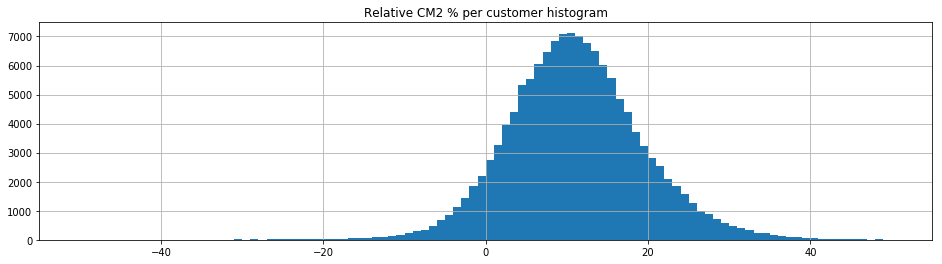

,CM2_REL
count,135051.00
mean,10.99
std,15.03
min,-3688.58
25%,5.66
50%,10.76
75%,16.04
max,84.82


CM2% threshold >= 1  is the percentile 9.79
CM2% threshold >= 2  is the percentile 12.2
CM2% threshold >= 3  is the percentile 15.12
CM2% threshold >= 4  is the percentile 18.37
CM2% threshold >= 5  is the percentile 22.3
CM2% threshold >= 6  is the percentile 26.41
CM2% threshold >= 7  is the percentile 30.89
CM2% threshold >= 8  is the percentile 35.67
CM2% threshold >= 9  is the percentile 40.74
CM2% threshold >= 10  is the percentile 45.98
CM2% threshold >=  6.81  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 1  is the percentile', stats.percentileofscore(data['CM2_REL'], 1, kind='strict').round(2))
print('CM2% threshold >= 2  is the percentile', stats.percentileofscore(data['CM2_REL'], 2, kind='strict').round(2))
print('CM2% threshold >= 3  is the percentile', stats.percentileofscore(data['CM2_REL'], 3, kind='strict').round(2))
print('CM2% threshold >= 4  is the percentile', stats.percentileofscore(data['CM2_REL'], 4, kind='strict').round(2))
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

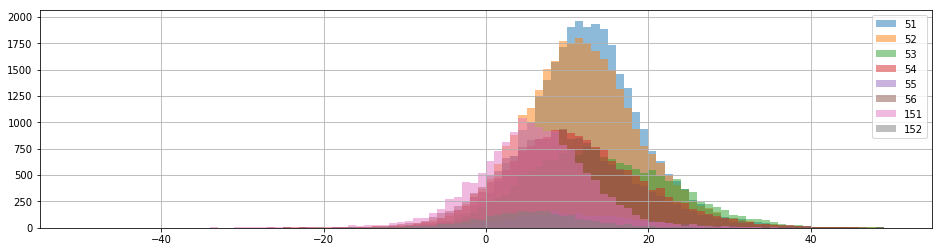

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56, 151, 152])
plt.show()   